In [7]:
import sys
from pathlib import Path
import os

current_dir = Path.cwd()
project_dir = current_dir.parent
sys.path.append(str(project_dir))

from settings import ANNOTATED_ARTICLES_FILE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import re
from scipy.stats import ttest_ind


# Load the annotated articles from the JSON file
annotated_articles = pd.read_json(ANNOTATED_ARTICLES_FILE)

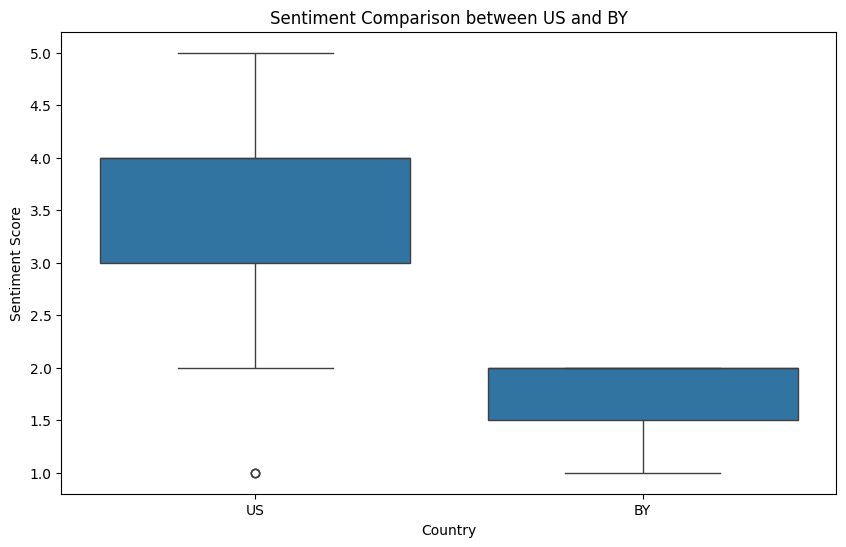

NameError: name 'ttest_ind' is not defined

In [8]:
def extract_country_from_filename(filename):
    match = re.search(r'_([A-Z]{2})_', filename)
    if match:
        return match.group(1)
    return None

annotated_articles['country'] = annotated_articles['filename'].apply(extract_country_from_filename)

# Filter the data to include only US and BY
filtered_articles = annotated_articles[(annotated_articles['country'] == 'US') | (annotated_articles['country'] == 'BY')]

# Compare sentiment across countries
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='sentiment_ukraine', data=filtered_articles)
plt.xlabel('Country')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Comparison between US and BY')
plt.show()

# Perform pairwise t-test to compare sentiment between US and BY
country1, country2 = 'US', 'BY'
sentiment1 = filtered_articles[filtered_articles['country'] == country1]['sentiment_ukraine']
sentiment2 = filtered_articles[filtered_articles['country'] == country2]['sentiment_ukraine']
t_statistic, p_value = ttest_ind(sentiment1, sentiment2)
print(f"\nPairwise t-test for sentiment comparison between {country1} and {country2}:")
print(f"T-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")